# Harmonic Oscillator

To compute the solutions to the harmonic oscillator, we use our previous methods of constructng the Hamiltonian as a matrix, and then using the linear algebra of Numpy to find the eigen values and eigen vectors.

In [1]:
from matplotlib import pyplot as plt
import numpy as np
hbar=1
m=1
omega=1
N = 2014
a = 20.0
x = np.linspace(-a/2.,a/2.,N)
h = x[1]-x[0] # Should be equal to 2*np.pi/(N-1)
V = .5*m*omega*x*x
# V[N/2]=2/h   # This would add a "delta" spike in the center.
Mdd = 1./(h*h)*(np.diag(np.ones(N-1),-1) -2* np.diag(np.ones(N),0) + np.diag(np.ones(N-1),1))
H = -(hbar*hbar)/(2.0*m)*Mdd + np.diag(V) 
En,psiT = np.linalg.eigh(H) # This computes the eigen values and eigenvectors
psi = np.transpose(psiT) 
# The psi now contain the wave functions ordered so that psi[n] if the n-th eigen state.

We want to verify that these resuls make sense, so we plot the wave functions and compute the norms. Note that the eigenvectors are normalized in such a way that $\sum \Large {\psi}^2_n (x_i)=1.$This does not take into account the step size that we used for discretizing the space. We want to plot the wave functions in such a way that they plot the same independent of our choice of step size. To do this we need to divide the array of numbers by $\sqrt\bigtriangleup x$ before plotting.

All the psi_n(x) are normalized.


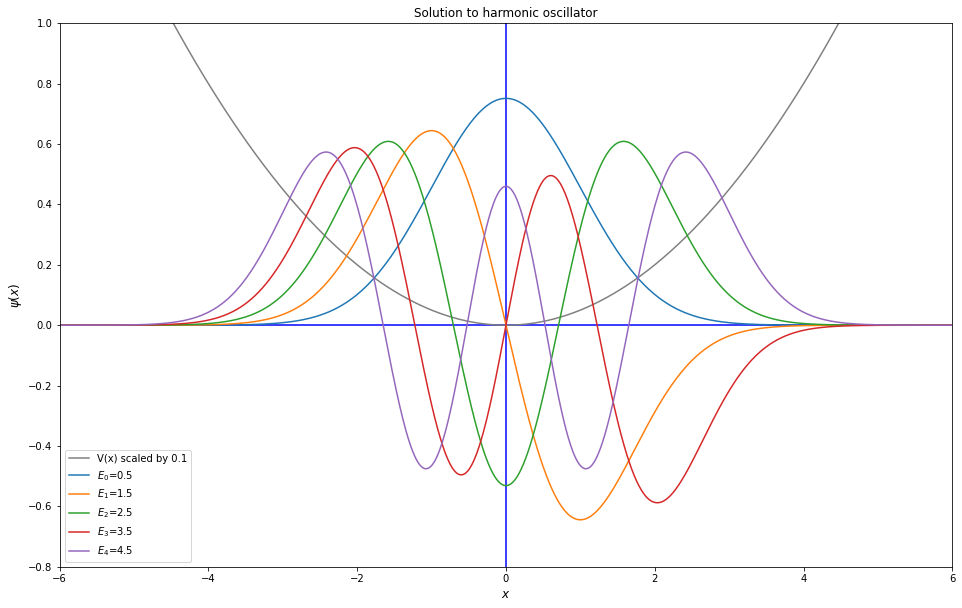

In [2]:
# Check the normalization of the wave function arrays.
notok=False
for n in range(len(psi)):
    # s = np.sum(psi[n]*psi[n])
    s = np.linalg.norm(psi[n])  # This does the same as the line above.
    if np.abs(s - 1) > 0.00001: # Check if it is different from one.
        print("Wave function {} is not normalized to 1 but {}".format(n,s))
        notok=True

if not notok:
    print("All the psi_n(x) are normalized.")

fig2 = plt.figure(figsize=[16,10])
plt.title('Harmonic Oscillator')
plt.ylabel('$\psi(x)$', fontsize=12)
plt.xlabel('$x$', fontsize=12)
plt.plot([0,0],[-6,V[0]],color="blue")
plt.plot([-a/2.,a/2.],[0,0],color="blue")
plt.plot(x,0.1*V,color="grey",label="V(x) scaled by 0.1")
plt.ylim((-.8,1.))
plt.xlim((-6.,6.))
for i in range(0,5):
    if psi[i][N//8] < 0:
        plt.plot(x,-psi[i]/np.sqrt(h),label="$E_{}$={:3.1f}".format(i,En[i]))
    else:
        plt.plot(x,psi[i]/np.sqrt(h),label="$E_{}$={:3.1f}".format(i,En[i]))

plt.title("Solution to harmonic oscillator")
plt.legend()
#plt.savefig("Harmonic_Oscillator_WaveFunctions.pdf")
plt.show()

We want to now plot the initial wave function. We could try to shift the already calculated $\Large{\Psi_0}(x)$array, but it is better to compute the function from a formula. The main reason for making this plot is to make sure the normalization of the function is correct. We would want the same normalization as our $\Large{\Psi_n}(x)$ arrays, so we need to muliply the function by $\sqrt\bigtriangleup x$ , which we then divide out again when we plot. Doing this makes sure that the $\Large c_n$
 factors we compute later are correct and with the same normalization.

Check the normalization of psi0:  0.9999999999996475


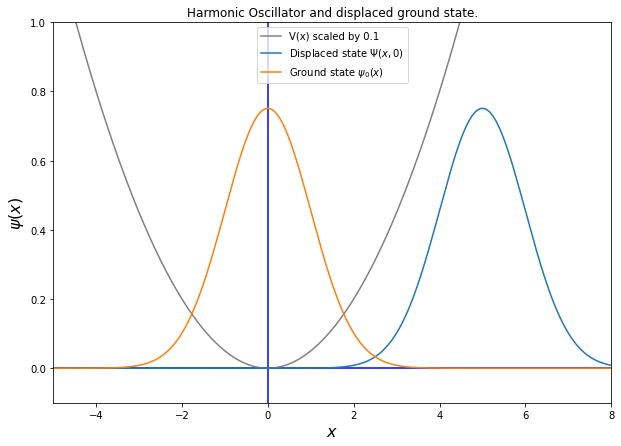

In [3]:
fig2 = plt.figure(figsize=[10,7])
plt.title('Harmonic Oscillator and displaced ground state.')
plt.ylabel('$\psi(x)$',fontsize=16)
plt.xlabel('$x$',fontsize=16)
plt.plot([0,0],[-6,V[0]],color="blue")
plt.plot([-a/2.,a/2.],[0,0],color="blue")
plt.plot(x,0.1*V,color="grey",label="V(x) scaled by 0.1")
plt.ylim((-.1,1.))
plt.xlim((-5.,8.))
a0=5.
alpha = (m*omega/(np.pi*hbar))**0.25
psi0 = np.sqrt(h)*alpha*np.exp(-(x-a0)**2*m*omega/(2*hbar))  # This is the formula for the displaced state.
n0 = np.linalg.norm(psi0)
print("Check the normalization of psi0: ",n0)
plt.plot(x,psi0/np.sqrt(h),label="Displaced state $\Psi(x,0)$")
plt.plot(x,-psi[0]/np.sqrt(h),label="Ground state $\psi_0(x)$")
plt.legend()
#plt.savefig("Displaced_state.pdf")
plt.show()

We can now compute the $\Large c_n$ factors as a simple sum of the product of the initial wave and the $\sqrt\bigtriangleup x$ eigen states. There are many ways to accomplish this, looping over the $N$ eigen states. The way I do this below is particularly efficient, creating a new Numpy array of the $\Large c_n$  factors. The line commented out does the calculation using list comprehension. The second line does this as a matrix multiplication.

We now compute the energy of this initial state, so we can plot the line on our graph. This was not part of the homework assignment, but it is nice to be able to draw this. We also compute the energy as 
$ E=\int \Psi^\ast (x,t=0) \hat H \Psi (x,t=0),$ and compare.
Once we have the $\Large c_n$ we can sum them to make sure the normalization is indeed correct: $ \sum |c_n|^2=1 $
We can also use them to calculate the expactation value of the energy of the state: $<E>=\sum |c_n|^2E_n$, which we can check against an algebraic computation:$<E>=<T>+<V>=\frac{1}{2} \hbar \omega + \frac{1}{2}m\omega^2|x_0|^2=\frac{1}{2}+\frac{1}{2}(5)^2=13$
And finally we can also compute it directly from the Hamiltonian: $<E>=< \Psi^\ast (x,t=0) |\hat H |\Psi (x,t=0)>=\int \Psi^\ast (x,t=0) \hat H \Psi (x,t=0) dx$

In [4]:
# cn=np.array([np.sum(psi[i]*psi0) for i in range(N)],dtype='float')
cn = psi.dot(psi0)
print(cn[0:18])
print("Check sum: {:6.4f}".format(np.sum(cn*cn)))
E = np.sum(np.conjugate(cn)*cn*En)
print("<E> = {:9.4f}".format(E))
E_check = np.sum( np.conjugate(psi0)*H.dot(psi0)) 
print("Check E=",E_check)

[-0.00193046  0.00682502  0.01706212 -0.03482709  0.06156486  0.09734085
  0.14049748 -0.18774601  0.23468183  0.2765762  -0.30922498 -0.32964117
  0.33644786  0.32992637 -0.31176559 -0.28461787 -0.25158598  0.21575014]
Check sum: 1.0000
<E> =   13.0000
Check E= 12.999996915605152


We now want to compute: $\Large \Psi(x,t)= \sum_n c_n \Psi_n(x) e^{i(n+\frac{1}{2})\omega t}$.
For a particular time $t$ we thus want an array of numbers representing $\Psi$  at that time. A technical detail here is that we want to sum all the $n$ values for a particular $X_i$ of the product $c_n \times \Psi_n \times \Phi_n(t)$. Our wavefunctions are arranged in such a way that this would be a sum over the columns instead of over the rows (which is what we did when checking the normalization). We can circumvent this priblem by using the original transposed version, psiT, of the wavefunctions. Below are three different implementation of this function, the first one is a bit more straight forward but slow, the second one is a bit faster (about a factor of 2.5), the third is fastest.

At this point you should start to worry about numerical accuracy. It turns out that for this particular situation the method we are using is accurate enough, and the solution is stable, that is, there are no diverging terms in the calculation. This will not be true for all situations where you solve the Schrödinger equation using matrix inversion (i.e. finding the eigen vectors). In many situations, including scattering, you will need to use more sophisticated ways of obtaining solutions.

0.0
0.7853981633974483
1.5707963267948966
2.356194490192345
3.141592653589793


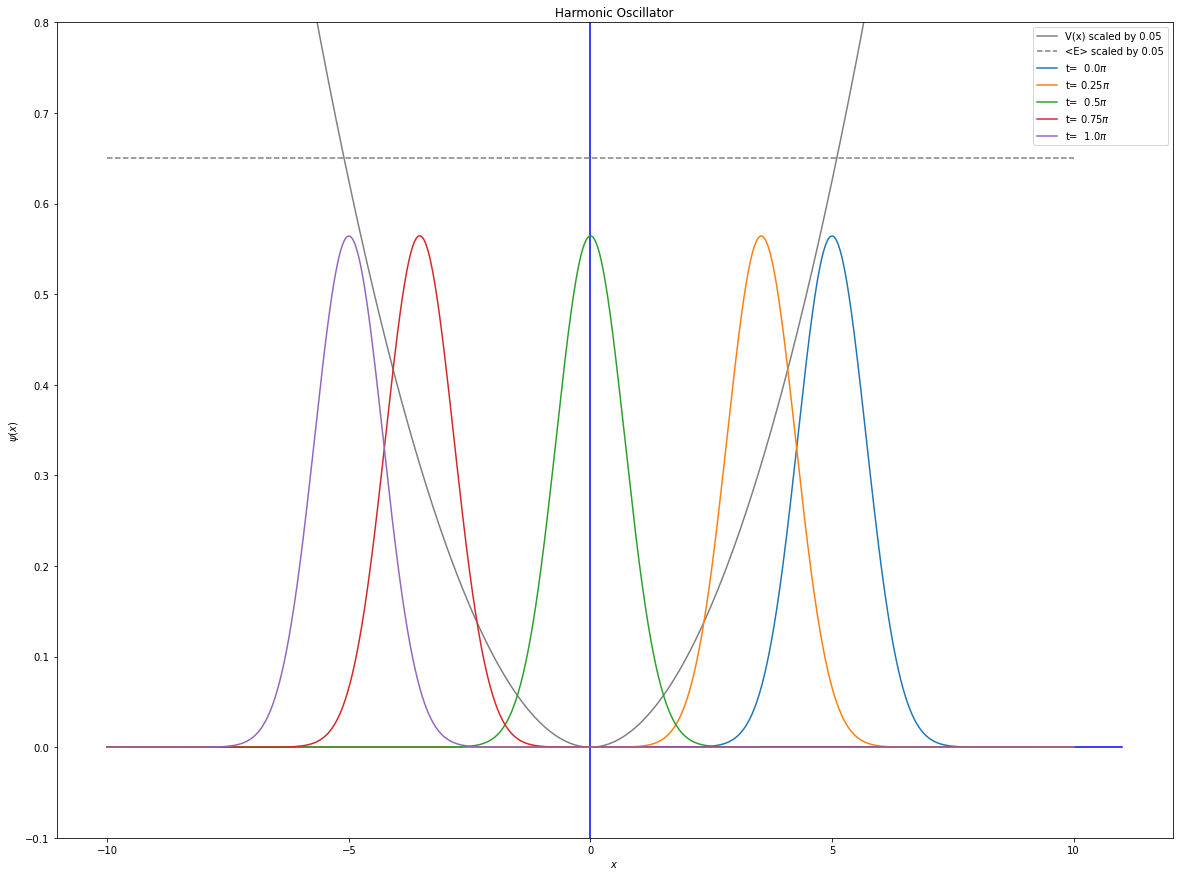

In [5]:
 #This version creates an array of zeros, to which it then sequentially adds each of the terms in the sum.
# Note that we use the global psi array.
def psi_xt(t,cn):
    out = np.zeros(N,dtype='complex128')
    for n in range(N): 
        out += cn[n]*psi[n]*np.exp(-1j*(n+0.5)*omega*t)
    return(out)

# This version uses np.sum to accomplish the same thing as the function above.
def psi_xt2(t,cn):
    n = np.arange(len(cn)) 
    times = np.exp(-1j*(n+0.5)*omega*t)
    out = psiT.dot(cn*times)
    return(out)

# This version uses np.sum and now also the previously calculated energyes.
# This way, psi_xt3 will work even if the potential is distorted and the energy levels are no longer (n+0.5)*hbar*omega
def psi_xt3(t,cn):
    out = psiT.dot(cn*np.exp(-1j*En*t/hbar))
    return(out)

fig2 = plt.figure(figsize=[20,15])
plt.title('Harmonic Oscillator')
plt.ylabel('$\psi(x)$')
plt.xlabel('$x$')
plt.plot([0,0],[-6,V[0]],color="blue")
plt.plot([-a/2.,a/2.+1.],[0,0],color="blue")
plt.plot(x,0.05*V,color="grey",label="V(x) scaled by 0.05")
plt.plot([-a/2.,a/2.],[E*0.05,E*0.05],color="grey",linestyle="dashed",label="<E> scaled by 0.05")
plt.ylim((-.1,0.8))
# plt.plot(x,psi0/np.sqrt(h),color='#dddddd')
for t in [0.,np.pi/4.,np.pi/2.,3.*np.pi/4.,np.pi]: # np.linspace(0,np.pi,8):
    print(t)
    plt.plot(x,np.abs(psi_xt3(t,cn))**2/h,label="t={:5.3}$\pi$".format(t/np.pi))
plt.legend()
#plt.savefig("Displaced_state_vs_time.pdf")
plt.show()